In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
test_news_df=pd.read_csv("news_test.csv")

In [34]:
test_news_df.head()
y = test_news_df['label']

In [35]:
#test evaluation
with open(r'C:\Users\sassi\tfidf_v.pkl', 'rb') as fichier:
    tfidf_v = pickle.load(fichier)

In [36]:
test_tfidf= tfidf_v .transform(test_news_df["text"])

In [44]:

#RandomForrest
with open(r'C:\Users\sassi\RandomForestClassifier.pkl', 'rb') as fichier:
    modele_importe_rf = pickle.load(fichier)
predictions = modele_importe_rf.predict(test_tfidf)
score_rf= accuracy_score(test_news_df['label'],predictions)
print(score_rf)
confusion = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(confusion)

0.9850746268656716
Confusion Matrix:
[[67  0]
 [ 2 65]]


Confusion Matrix:
[[67  0]
 [ 2 65]]


0.9850746268656716

In [45]:
#logisticregression
with open(r'C:\Users\sassi\LogisticRegression.pkl', 'rb') as fichier:
    modele_importe_lr= pickle.load(fichier)
predictions = modele_importe_lr.predict(test_tfidf)
score_rf= accuracy_score(test_news_df['label'],predictions)
print(score_rf)

confusion = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(confusion)

0.835820895522388
Confusion Matrix:
[[66  1]
 [21 46]]


In [46]:
##passiveaggressiveclassifier
with open(r'C:\Users\sassi\PassiveAggressiveClassifier.pkl', 'rb') as fichier:
    modele_importe_pag = pickle.load(fichier)
predictions = modele_importe_pag.predict(test_tfidf)
score_rf= accuracy_score(test_news_df['label'],predictions)
print(score_rf)
confusion = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(confusion)

0.8880597014925373
Confusion Matrix:
[[67  0]
 [15 52]]


In [47]:
##kneighborsclassifier
with open(r'C:\Users\sassi\KNeighborsClassifier.pkl', 'rb') as fichier:
    modele_importe_kn = pickle.load(fichier)
predictions = modele_importe_kn.predict(test_tfidf)
score_rf= accuracy_score(test_news_df['label'],predictions)
print(score_rf)
confusion = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(confusion)

0.8507462686567164
Confusion Matrix:
[[63  4]
 [16 51]]


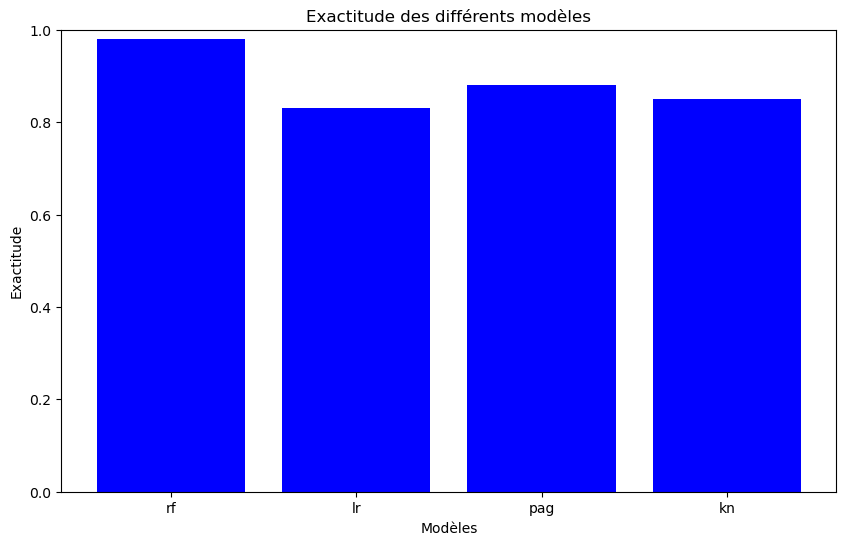

In [48]:
import matplotlib.pyplot as plt

# Noms des modèles
modele_noms = ['rf', 'lr', 'pag', 'kn']

# Valeurs d'exactitude correspondantes
exactitude = [0.98, 0.83, 0.88, 0.85]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(modele_noms, exactitude, color='blue')
plt.xlabel('Modèles')
plt.ylabel('Exactitude')
plt.title('Exactitude des différents modèles')
plt.ylim(0, 1)  # Plage de l'axe des ordonnées (0 à 1)
plt.show()

In [1]:
def search(text):
    data=[]
    url = 'https://google.com/search?q=' + text
    request_result=requests.get( url )
    soup = bs4.BeautifulSoup(request_result.text, "html.parser")
    heading_object=soup.find_all( 'h3' )
    for info in heading_object:
        print(info.getText())
        data.append(info.getText())
    return data

In [ ]:
import numpy as np
def cosine_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2]).toarray()
    vector1 = vectors[0]
    vector2 = vectors[1]
    # Calculer le produit scalaire des vecteurs
    dot_product = np.dot(vector1, vector2)
    # Calculer les normes des vecteurs
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    # Calculer la similarité du cosinus
    similarity = dot_product / (norm1 * norm2)
    return similarity